# Loading Data 

In [179]:
# Finding the path of Spark
import findspark
findspark.init()
findspark.find()

'C:\\BigData\\Spark'

In [180]:
# Importing PySpark and other libraries from PySpark
import pyspark
from pyspark.context import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()
from pyspark import SQLContext
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType

In [181]:
#printing the Spark version
print(sc.version)
print(spark.version)

2.4.8
2.4.8


In [182]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [183]:
# importing the libraries that are available for statistical modelling and visualizations. 
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

In [184]:
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.feature import StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import RegressionEvaluator 

In [185]:
#create spark session
spark = SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName('credit_card_churn').getOrCreate()

In [186]:
#creating a dataframe 
df = spark.read.csv('C:/Users/SRR/Desktop/Final_Project/credit_card_churn.csv', header=True, inferSchema=True)
df.show()

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [187]:
#To Render dataframe into proper grids 
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

df.show()

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [188]:
df.show(5)

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [189]:
df.select("Education_Level").show(5)

+---------------+
|Education_Level|
+---------------+
|    High School|
|       Graduate|
|       Graduate|
|    High School|
|     Uneducated|
+---------------+
only showing top 5 rows



In [190]:
#Total Number of Rows in the dataset 
df.count()

10127

In [191]:
#print schema 
df.printSchema()

root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (n

In [192]:
#writing csv file to parquet
df.write.parquet("credit_card_churn.parquet")

In [193]:
#reading the parquet data
parquetdf = spark.read.parquet("credit_card_churn.parquet")

In [194]:
#displaying the parquet dataframe 
parquetdf.show()

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [195]:
#printing schema of parquet data 
parquetdf.printSchema()

root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (n

In [196]:
#counting number of rows in the dataset 
number_rows = parquetdf.count()
print("number of rows:",number_rows)

number of rows: 10127


In [197]:
#displaying parquet dataframe in pandas format 
parquetdf.toPandas()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [198]:
#displaying top 5 rows of parquet data 
parquetdf.head(5)

[Row(CLIENTNUM=768805383, Attrition_Flag='Existing Customer', Customer_Age=45, Gender='M', Dependent_count=3, Education_Level='High School', Marital_Status='Married', Income_Category='$60K - $80K', Card_Category='Blue', Months_on_book=39, Total_Relationship_Count=5, Months_Inactive_12_mon=1, Contacts_Count_12_mon=3, Credit_Limit=12691.0, Total_Revolving_Bal=777, Avg_Open_To_Buy=11914.0, Total_Amt_Chng_Q4_Q1=1.335, Total_Trans_Amt=1144, Total_Trans_Ct=42, Total_Ct_Chng_Q4_Q1=1.625, Avg_Utilization_Ratio=0.061, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1=9.3448e-05, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2=0.99991),
 Row(CLIENTNUM=818770008, Attrition_Flag='Existing Customer', Customer_Age=49, Gender='F', Dependent_count=5, Education_Level='Graduate', Marital_Status='Single', Income_Category='Less than $40K', Card

In [199]:
# print last 5 rows
parquetdf.toPandas().info

<bound method DataFrame.info of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income

# Removing Duplicates

In [200]:
# check for duplicates
parquetdf.toPandas().duplicated().sum()

0

In [201]:
parquetdf.toPandas()['CLIENTNUM'].duplicated().sum()

0

# Finding Null values 

In [202]:
parquetdf.toPandas().isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

No Duplicate Values, No null Values 

# Droping unwanted features

In [203]:
parquetdf.toPandas().sample(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
9818,711663858,Existing Customer,28,M,1,Post-Graduate,Single,Unknown,Blue,13,...,20030.0,1204,18826.0,0.979,15862,127,0.693,0.060,0.000334,0.99967
1089,715482483,Existing Customer,26,M,0,High School,Single,Unknown,Blue,36,...,3184.0,1421,1763.0,0.712,2253,59,0.439,0.446,0.000160,0.99984
2502,816325533,Existing Customer,39,F,1,Graduate,Married,Less than $40K,Blue,34,...,6458.0,1802,4656.0,0.923,2315,49,0.581,0.279,0.000838,0.99916


# Unwanted features 
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 : Naive Bayes from another machine learning model
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 : Naive Bayes from another machine learning model

In [204]:
#deleted unwanted attributes 
unwanted = ("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
            "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2")

dfparquet = df.drop(*unwanted)
dfparquet.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int32  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int32  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int32  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int32  
 10  Total_Relationship_Count  10127 non-null  int32  
 11  Months_Inactive_12_mon    10127 non-null  int32  
 12  Contacts_Count_12_mon     10127 non-null  int32  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [205]:
#displaying the dataset after removing unwanted features in the parquet dataset 
dfparquet.show()

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|
+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------

In [206]:
dfparquet.write.format("mongo").mode("append")\
.option("inferSchema", True)\
.option("uri", myAtlasMongoDBuri)\
.option("database", myDatabase)\
.option("collection", "column_stats")\
.save()

NameError: name 'myAtlasMongoDBuri' is not defined

# Exploratory Data Analysis and Visualizations

In [207]:
#Summary statistics of the data 
dfparquet.describe().show()

+-------+-------------------+-----------------+-----------------+------+------------------+---------------+--------------+---------------+-------------+------------------+------------------------+----------------------+---------------------+-----------------+-------------------+-----------------+--------------------+-----------------+-----------------+-------------------+---------------------+
|summary|          CLIENTNUM|   Attrition_Flag|     Customer_Age|Gender|   Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|    Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|     Credit_Limit|Total_Revolving_Bal|  Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|  Total_Trans_Amt|   Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|
+-------+-------------------+-----------------+-----------------+------+------------------+---------------+--------------+---------------+-------------+------------------+------------------------+----------

In [208]:
#Finding number of unique values in Education level 
parquetdf.select('Education_Level').distinct().count()

7

In [209]:
#sorting data by certain attribute
sortedattribute = parquetdf.orderBy("Card_Category")
sortedattribute.show(10)

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [210]:
#calculating number of clients or customers with respect to their age group and Gender
clients_age = parquetdf.groupBy("Customer_Age","Gender").count()
clients_age.show(5)

+------------+------+-----+
|Customer_Age|Gender|count|
+------------+------+-----+
|          58|     F|   84|
|          45|     M|  214|
|          62|     F|   54|
|          61|     F|   40|
|          30|     F|   33|
+------------+------+-----+
only showing top 5 rows



In [211]:
dfparquet.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CLIENTNUM,10127,7.391776063336625E8,3.690378345023116E7,708082083,828343083
Attrition_Flag,10127,None,None,Attrited Customer,Existing Customer
Customer_Age,10127,46.32596030413745,8.016814032549046,26,73
Gender,10127,None,None,F,M
Dependent_count,10127,2.3462032191172115,1.29890834890379,0,5
Education_Level,10127,None,None,College,Unknown
Marital_Status,10127,None,None,Divorced,Unknown
Income_Category,10127,None,None,$120K +,Unknown
Card_Category,10127,None,None,Blue,Silver


In [212]:
#dividing numeric variables 
numeric_features = [t[0] for t in dfparquet.dtypes if t[1] == 'int' or t[1] == 'double' or t[1] == 'float']

In [213]:
#displaying numeric variables 
numeric_features

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

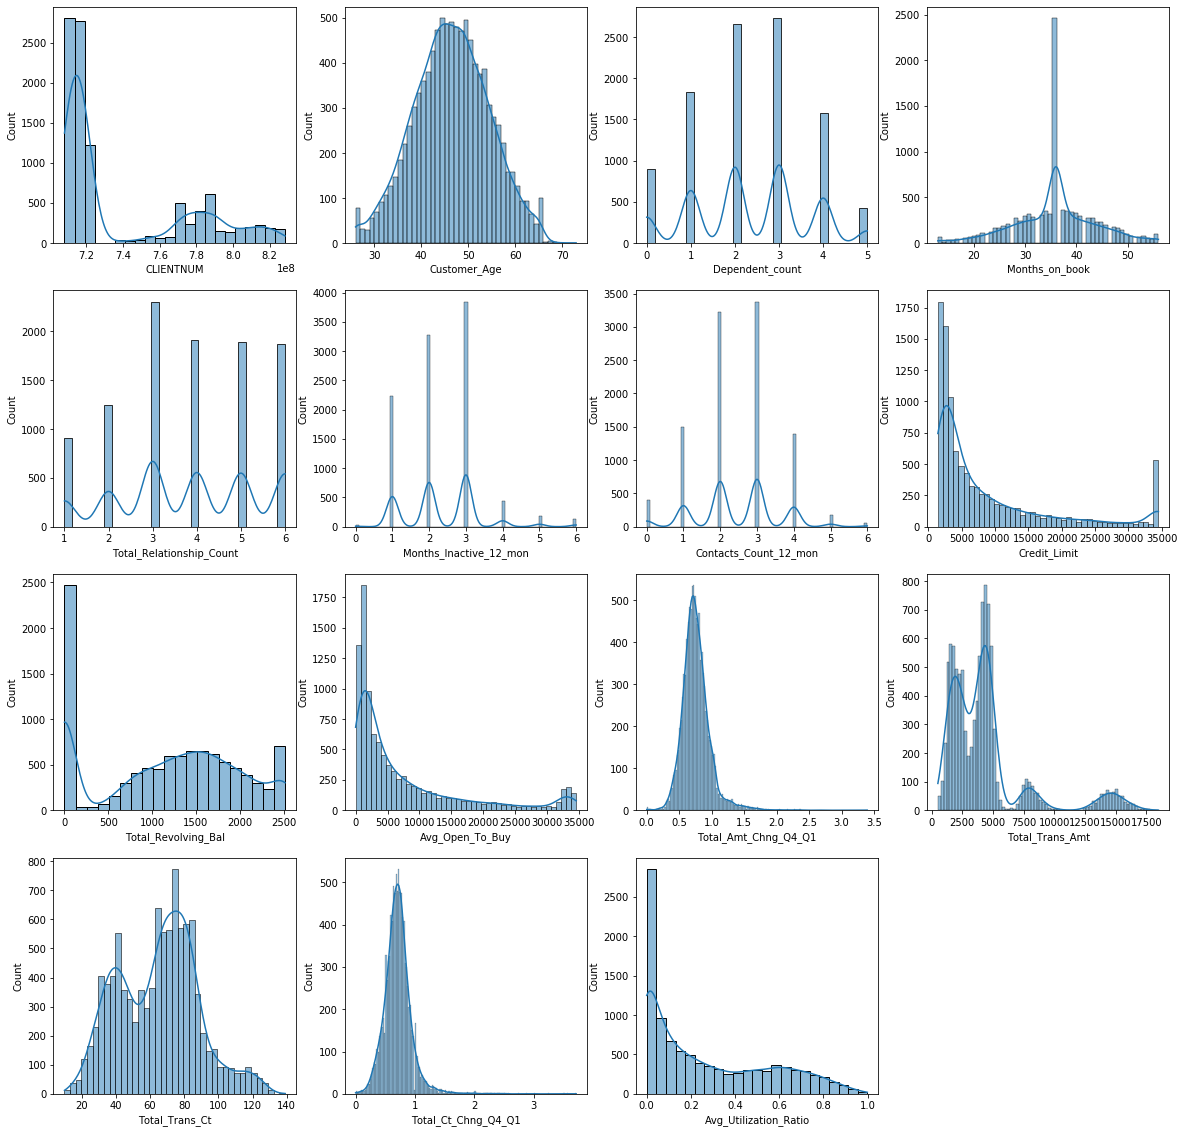

In [214]:
#performing histograms on numerical features using matplotlib library 
n = len(numeric_features)
plt.figure(figsize=(20, 20))
for i in range(n):
    plt.subplot(4, 4, i+1)
    sns.histplot(dfparquet.toPandas()[numeric_features[i]], kde=True)
plt.show()

- The above visualization depicts the histogram where the count of each attribute is given.
- The first histogram shows the client number, the second histogram shows the customer age and we can conclude that the 40-50 age people are more in this dataset.
- The third histogram depicts the dependents count in the dataset. The fourth histogram gives the months in which the credited card is active which is months_on_book.
- The next histogram gives us the total_relationship_count. Next graph shows the number of people who are inactive for more than 12 months.
- Next one shows the contacts_count_12_months which shows the contacts in the next 12 months. Next graph is the credit_limit count.
- Most of the people have a credit limit between 1000-4000. The other graphs show the other attributes from the graphs and they count in the dataset.

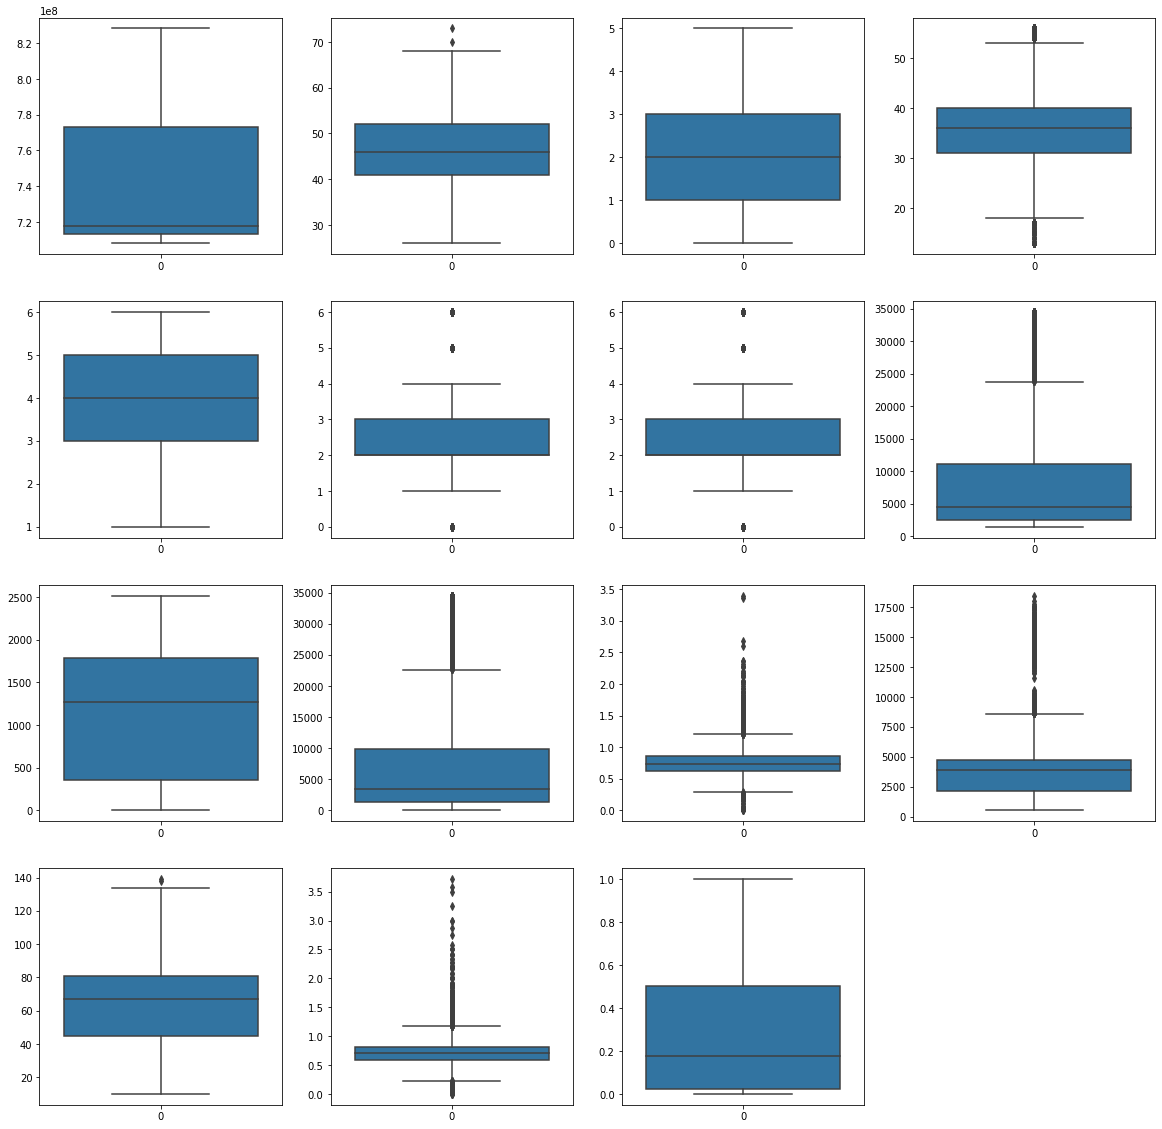

In [215]:
# performing boxplot on numerical variables 
plt.figure(figsize=(20, 20))
for i in range(n):
    plt.subplot(4, 4, i+1)
    sns.boxplot(dfparquet.toPandas()[numeric_features[i]])
plt.show()

- The above box plot has been plotted for numerical features, visualizing the distribution of the dataset, aiding in exploratory data anaysis and outlier detection

In [216]:
#dividing Categorical features
categorical_features = [t[0] for t in dfparquet.dtypes if t[1] == 'string' or t[1] == 'boolean' or t[1] == 'timestamp' or t[1] == 'date']

In [217]:
#displaying categorical features
categorical_features

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [218]:
dfparquet.toPandas().describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


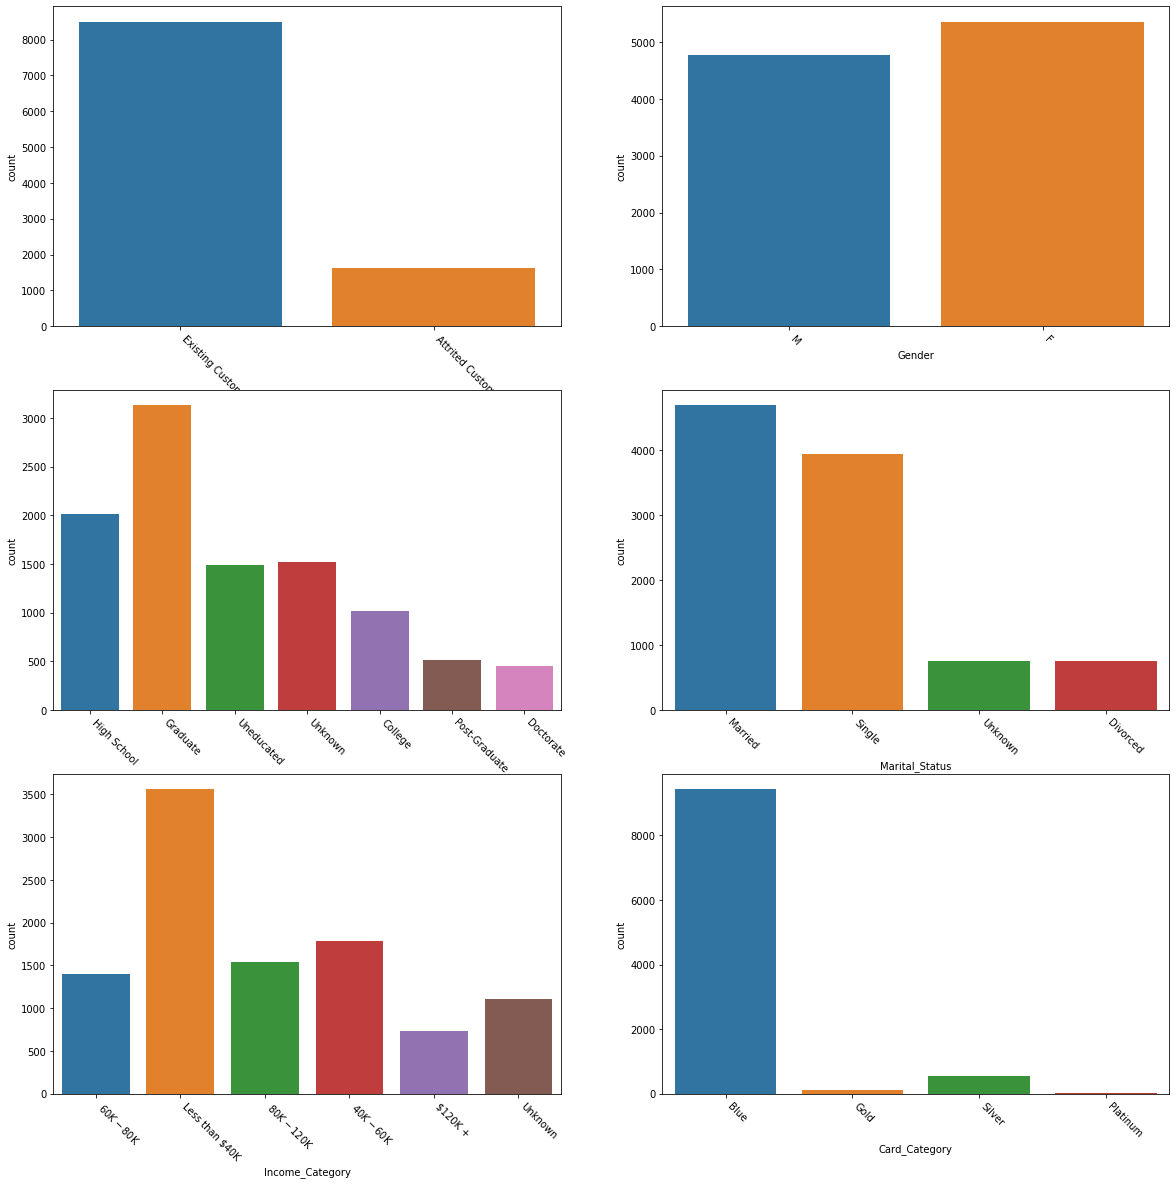

In [219]:
# Performing barplot on categorical data
# Each graph below gives analysis for categorical data.
cat = list(df.toPandas().describe(include='object').T.index)

plt.figure(figsize=(20, 20))
for i in range(len(cat)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=cat[i], data=dfparquet.toPandas())
    plt.xticks(rotation=-45, ha='left')
plt.show()

- Plot 1 depicts the number of people who are existing customers and the numbers who are attrited which means they left the credit card after a while. There are 8000 people existing and around 2000 people who left the credit card.- 
Plot 2 depicts the gender where it gives the number of male and the number of females who are having the credit card. It can be concluded that the female population is more than male who hav the particular credit cards.
- Plot 3 depicts the designation of people which means the count is calculated based on the designation. It can be seen that graduates apply more for credit cards than other occupations. And the least people who are having the credit card have a designation of Doctorate.
- Plot 4 depicts the credit card count based on the marital status. Married people are more likely to have a credit card than single people. The least count is from people who are divorced. Divorced people are less likely to have a credit card.
- Plot 5 is the main factor in approving the credit limit which is income_category. People with an income of less than 40k are more likely to have a credit card than the people with more income.
- Plot 6 depicts people's choice of card. It shows that the blue card is used more compared to other cards. rds.


In [220]:
eda1 = dfparquet.groupby('Income_Category').agg({'Attrition_Flag':'count'})
eda1 = eda1.withColumnRenamed('count(Attrition_Flag)', 'Customer')
eda1 = eda1.toPandas()
eda1['Ratio'] = round((eda1['Customer']/eda1['Customer'].sum())*100,2)
eda1

,Income_Category,Customer,Ratio
0,$120K +,727,7.18
1,$60K - $80K,1402,13.84
2,$80K - $120K,1535,15.16
3,Unknown,1112,10.98
4,$40K - $60K,1790,17.68
5,Less than $40K,3561,35.16


Text(0.5, 1.0, 'Distribution of Customer Income')

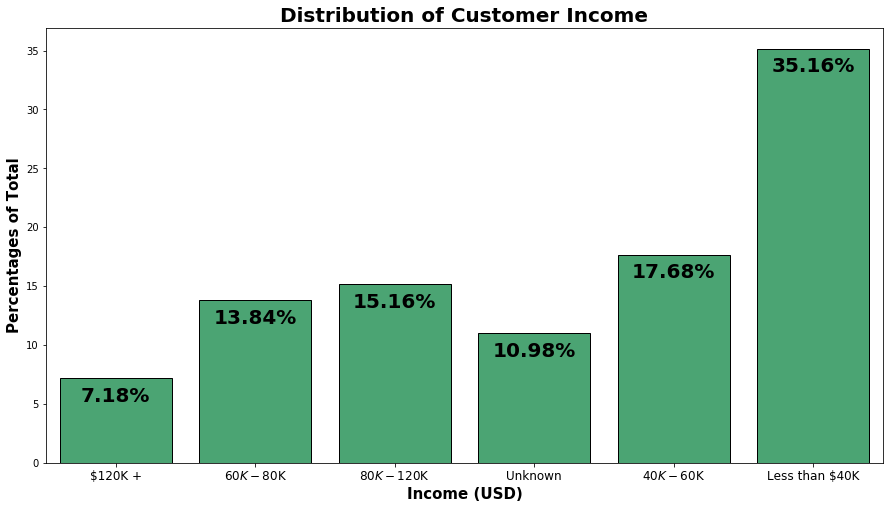

In [221]:
#plotting the customer income with respect to percentage
plt.figure(figsize = (15,8))
sns.barplot(data = eda1, x='Income_Category', y='Ratio', color='mediumseagreen', edgecolor='black')
plt.xlabel('Income (USD)', size=15, weight='bold')
plt.xticks(size=12)
plt.ylabel('Percentages of Total', size=15, weight='bold')
for i in range(len(eda1)):
    plt.text(x=i, y=eda1.loc[i, 'Ratio'] - 2, s=str(eda1.loc[i,'Ratio']) + '%', ha='center', size=20, weight='bold')
plt.title('Distribution of Customer Income', size=20, weight='bold')

- The above graph shows the percentage of people in a range of incomes. the highest percentage of income is for the people who have <40k as income which is 35.16%

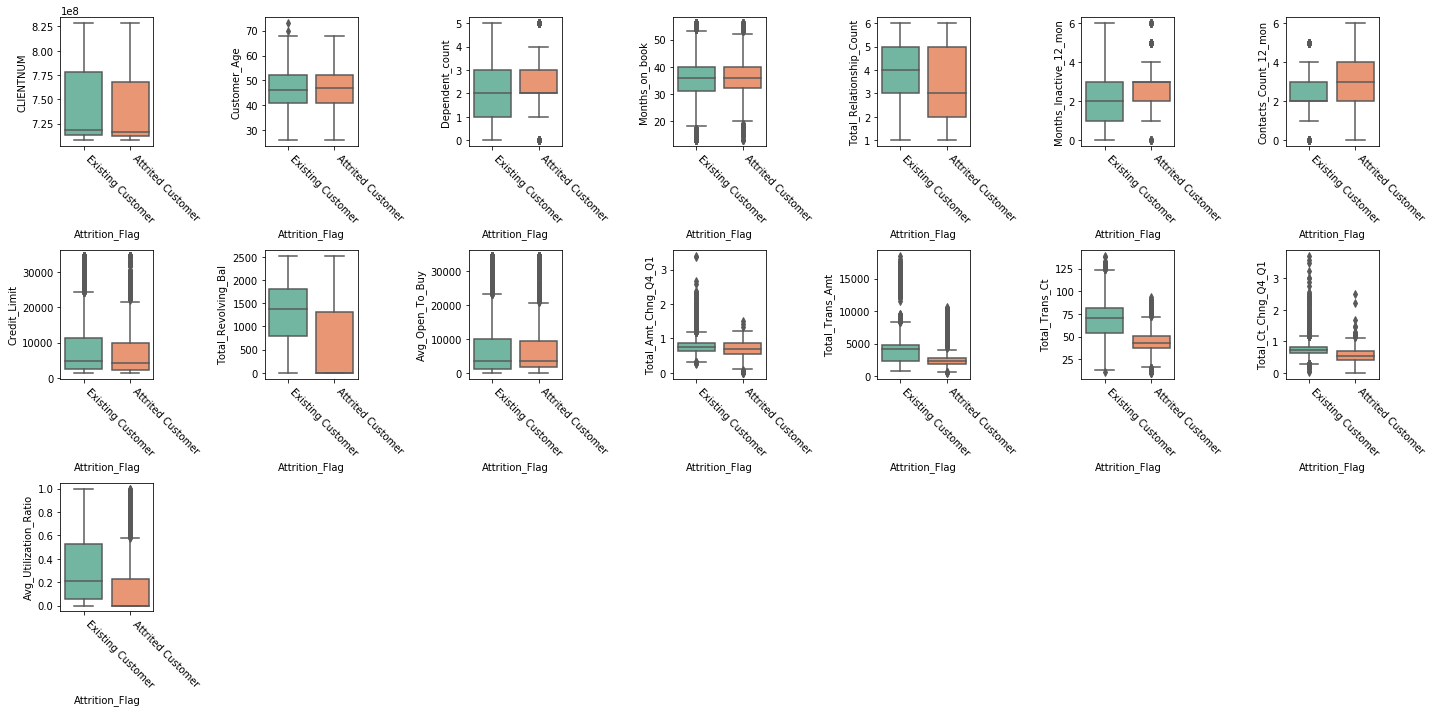

In [222]:
#drawing the boxplot for Attrition_flag variable with respect to other parameters
num = list(dfparquet.toPandas().describe().columns)
plt.figure(figsize=(20,10))
for i in range(0, len(num)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=dfparquet.toPandas()[num[i]], orient='v', x=df.toPandas()['Attrition_Flag'], palette="Set2")
    plt.xticks(rotation=-45, ha='left')
    plt.tight_layout()

- I've used box plots to visually represent our data as box plot is a useful tool for visualizing the distribution of numerical data, in the above visualization. I've shown how different numerical variables like Customer_age, Dependent_count, Credit_limit, Avg_utilization rate etc. will affect the Attrition flag which is our output variable.
- From the boxplot I can see that customers Attrition is majorly dependent on the factors like Relationship_count, Contacts_count_12month, Total_revolving_balance, and variables like Transaction_amount, Transaction_count, Total_Ct_Chng_Q4-Q1 have a very less effect on the customer attrition.

Text(0.5, 1.0, 'Transaction Count vs Transaction Amount')

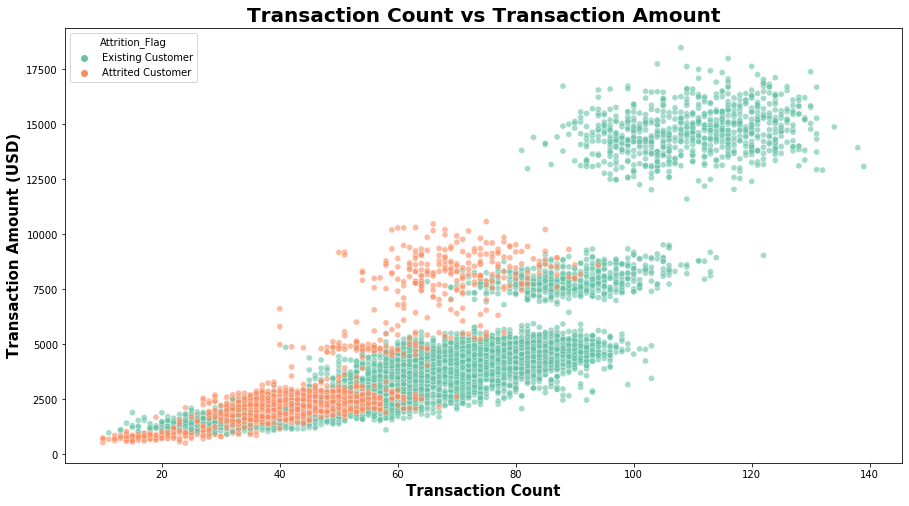

In [223]:
#displaying the scatterplot between Transaction count and Transaction amount with respect to Attrition_flag 
plt.figure(figsize=(15,8))
sns.scatterplot(data=dfparquet.toPandas(), x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Attrition_Flag', alpha=0.6, palette='Set2')
plt.xlabel('Transaction Count', size=15, weight='bold')
plt.ylabel('Transaction Amount (USD)', size=15, weight='bold')
plt.title('Transaction Count vs Transaction Amount', size=20, weight='bold')

- The above scatter plot is plotted with respect to the transaction count vs transaction amount for both the existing customers and attrited customers. The green color shows the transaction count of existing customers and the orange color shows the transaction count of attrited customers.

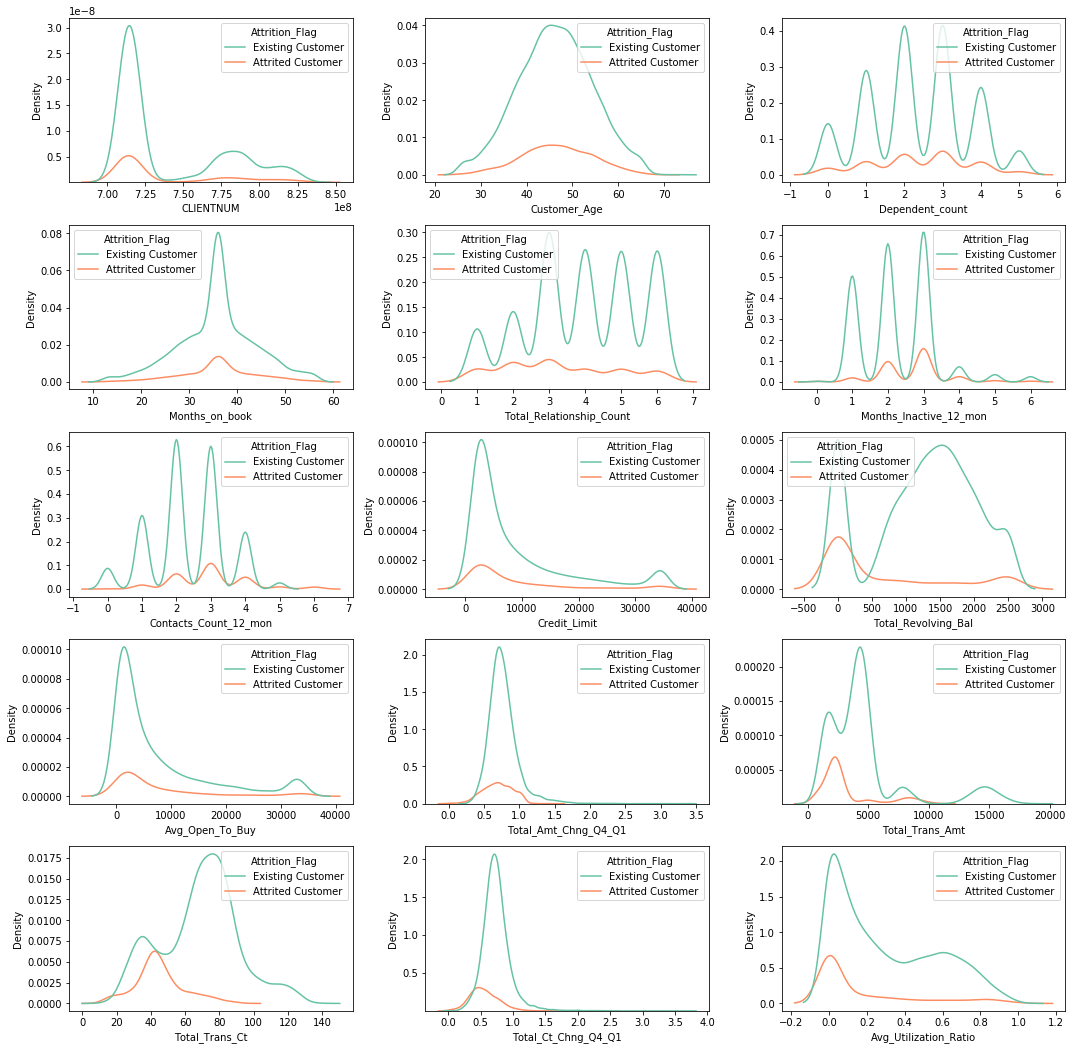

In [224]:
num = list(dfparquet.toPandas().describe().columns)
plt.figure(figsize=(15, 20))
for i in range(0, len(num)):
    plt.subplot(7, 3, i+1)
    sns.kdeplot(x=dfparquet.toPandas()[num[i]], palette="Set2", hue=dfparquet.toPandas()['Attrition_Flag'])
    plt.xlabel(num[i])
    plt.tight_layout()

- The above plot visualizes the distribution of numerical features in a dataset using KDE plots, grouped by the Attrition_Flag column. It creates a grid of subplots, with each plot showing how a feature's distribution varies based on attrition status, aiding exploratory data analysis and pattern detection. 

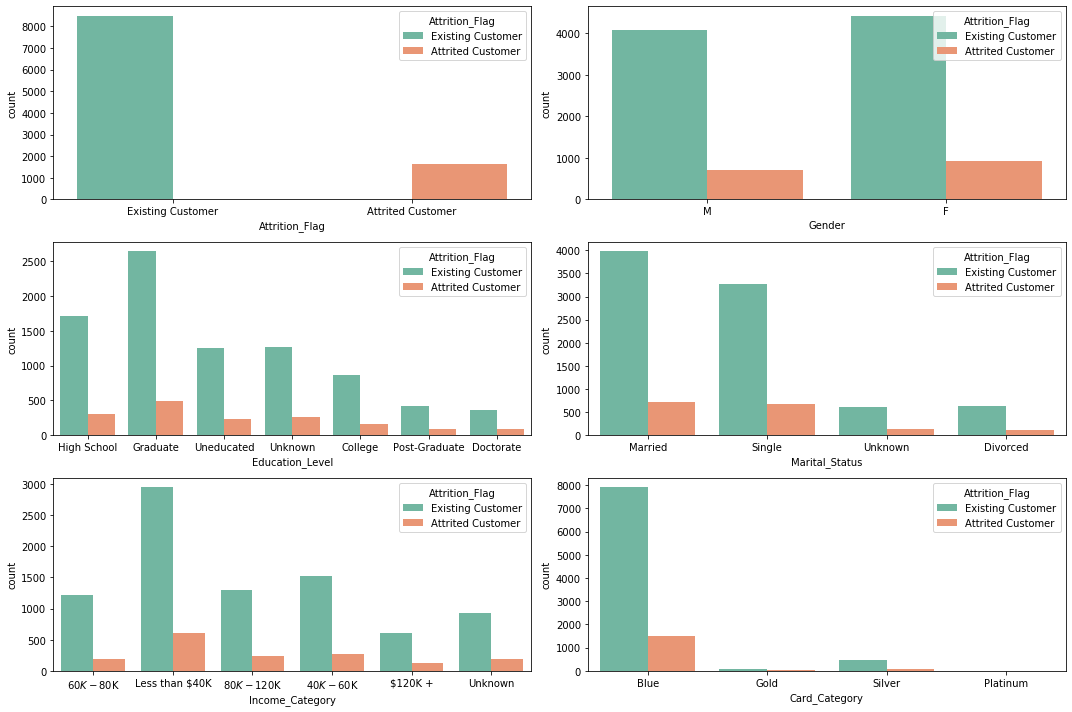

In [225]:
#displaying the count of categorical variables with respect to the Attrition_flag
cat = list(dfparquet.toPandas().describe(include='object').columns)
plt.figure(figsize=(15,10))
for i in range(0, len(cat)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = dfparquet.toPandas()[cat[i]], orient='v', hue=dfparquet.toPandas()['Attrition_Flag'], palette="Set2")
    plt.tight_layout()

- I have plotted the number of people with respect to Attrition flag for categorical variables. 
- Plot 1 shows number of people who are existing and attrited. Attrited customers are less compared to existing customers.
- Plot 2 shows the male : Female count of both existing and attrited customers. Compared to male, female customers are more in both attrited and existing customers.
- Plot 3 shows the designation of people who are both existing and attrited. Existing and attrited customers are more for graduate students.
- Plot 4 shows the martial status for both existing and attrited customers. Married people most of them are existing customers. Same goes to the attrited. Attrited customers are more in case of married people.
- Plot 5 gives the summary of people existing and attrited customers according to their income. People with less than 40k income are more existing and attrited.
- Plot 6 gives the type of card for both existed and attrited customers. Blue card is used most compared to other cards. 

In [226]:
# missing values
from pyspark.sql.functions import isnan, when, count, col
dfMissing=dfparquet.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dfparquet.columns])
dfMissing.toPandas().T

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [227]:
# copy dataframe to new dataframe
dfLabeled = dfparquet

dfLabeled.toPandas().describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [228]:
mapAttrition = {'Attrited Customer':1, 'Existing Customer':0}
mapGender = {'M':1, 'F':0}
mapCard = {'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}
indexer = StringIndexer(inputCol='Attrition_Flag', outputCol='Attrition_Flag_Index_i')
dfLabeled = indexer.fit(dfLabeled).transform(dfLabeled)
dfLabeled.show()

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Attrition_Flag_Index_i|
+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+

In [229]:
dfparquet.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CLIENTNUM,10127,7.391776063336625E8,3.690378345023116E7,708082083,828343083
Attrition_Flag,10127,None,None,Attrited Customer,Existing Customer
Customer_Age,10127,46.32596030413745,8.016814032549046,26,73
Gender,10127,None,None,F,M
Dependent_count,10127,2.3462032191172115,1.29890834890379,0,5
Education_Level,10127,None,None,College,Unknown
Marital_Status,10127,None,None,Divorced,Unknown
Income_Category,10127,None,None,$120K +,Unknown
Card_Category,10127,None,None,Blue,Silver


- Modelling: The next is to develop models for making predictions after discovering the statistics and learning from data exploration. Since the target variable is a categorical variable, classification models are required to be used.
- String Indexer: A label indexer that converts labels from a string column to label indices in an ML column. We convert a numeric input column to a string and index the string values if it is numeric. The indeces are in the format[0, numLabels]. Numerous categorical variables incorporate strings or a combination of strings and numbers as distinct elements. Therefore, these columns have to be converted to uniform values to preserve uniformity. As a result, the String indexer, which can turn a single column into an index column, was embedded into the code. 

In [230]:
# Using PySpark Workflow, for building and evaluating a machine learning model.
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# convert categorical features to numerical features
for i in cat:
    indexer = StringIndexer(inputCol=i, outputCol=i+'_index')
    dfparquet = indexer.fit(dfparquet).transform(dfparquet)
    dfparquet = dfparquet.drop(i)

In [231]:
dfparquet.show(5)

+---------+------------+---------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+--------------------+------------+---------------------+--------------------+---------------------+-------------------+
|CLIENTNUM|Customer_Age|Dependent_count|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Attrition_Flag_index|Gender_index|Education_Level_index|Marital_Status_index|Income_Category_index|Card_Category_index|
+---------+------------+---------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+-------------

In [232]:
dfparquet.toPandas().head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_index,Gender_index,Education_Level_index,Marital_Status_index,Income_Category_index,Card_Category_index
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,1144,42,1.625,0.061,0.0,1.0,1.0,0.0,3.0,0.0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,1291,33,3.714,0.105,0.0,0.0,0.0,1.0,0.0,0.0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,1887,20,2.333,0.000,0.0,1.0,0.0,0.0,2.0,0.0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,1171,20,2.333,0.760,0.0,0.0,1.0,2.0,0.0,0.0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,816,28,2.500,0.000,0.0,1.0,3.0,0.0,3.0,0.0


In [233]:
#Splitting the data for training and testing into 70 and 30 
weights = [0.7, 0.3]
seed = 123

train_data, test_data = dfparquet.randomSplit(weights, seed)

In [234]:
# Printing the number of training set data and testing set data, and summary stats of the training data
print("Training set:", train_data.count())
print("Testing set:", test_data.count())

train_data.toPandas().describe()

Training set: 7038
Testing set: 3089


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_index,Gender_index,Education_Level_index,Marital_Status_index,Income_Category_index,Card_Category_index
count,7.038000e+03,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,...,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000
mean,7.389720e+08,46.297954,2.359335,35.902529,3.819977,2.322109,2.446292,8549.674339,1172.337880,7377.336459,...,4430.779909,65.126314,0.711357,0.279302,0.158994,0.465189,1.853794,0.762148,1.673487,0.081131
std,3.677032e+07,7.957666,1.302387,7.926577,1.554052,0.997138,1.110570,9040.963203,816.851361,9049.803289,...,3398.551318,23.518193,0.235219,0.277191,0.365697,0.498822,1.758414,0.879062,1.640388,0.330504
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,...,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.130421e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2541.000000,468.000000,1281.000000,...,2181.000000,45.000000,0.583000,0.026000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.178814e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4476.000000,1289.500000,3412.000000,...,3922.000000,67.000000,0.702500,0.182000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,7.727810e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10812.750000,1791.000000,9613.250000,...,4746.000000,81.000000,0.818000,0.510000,0.000000,1.000000,3.000000,1.000000,3.000000,0.000000
max,8.282989e+08,70.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,...,18484.000000,139.000000,3.714000,0.999000,1.000000,1.000000,6.000000,3.000000,5.000000,3.000000


In [235]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

lr = LogisticRegression(labelCol='Attrition_Flag_index', featuresCol='features', maxIter=10)

In [236]:
# printing the schema of training data. 
train_data.printSchema()

root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nullable = true)
 |-- Attrition_Flag_index: double (nullable = false)
 |-- Gender_index: double (nullable = false)
 |-- Education_Level_index: double (nullable = false)
 |-- Marital_Status_index: double (nullable = false)
 |-- Income_Category_index: double (nullable = f

In [237]:
output = 'Attrition_Flag_index'
features = list(dfparquet.toPandas().columns) # create a list of features
features.remove(output) # remove the output column from the list of features

# create a vector of features
assembler = VectorAssembler(inputCols=features, outputCol='features')
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

In [238]:
train_data.printSchema()

root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nullable = true)
 |-- Attrition_Flag_index: double (nullable = false)
 |-- Gender_index: double (nullable = false)
 |-- Education_Level_index: double (nullable = false)
 |-- Marital_Status_index: double (nullable = false)
 |-- Income_Category_index: double (nullable = f

In [239]:
#train the model 
lrModel = lr.fit(train_data)

In [240]:
# Printing the coefficients and Intercept for the logistic regression model
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: [5.633978170647474e-09,0.011587064913991944,0.07976537672712516,0.006769437148213738,-0.2717737320884174,0.4479200843593715,0.5142253317566184,-7.686237210537668e-06,-0.0007380241989016063,-1.6584056105544808e-06,-1.1655469447845015,-0.00010577939299526465,-0.04188892800747007,-3.0947005400128917,-1.3430370787737318,-0.3009394655371811,0.05299261931085505,0.0406380052077826,-0.024945697346901958,0.06325517531148916]
Intercept: -1.645086176539226


In [241]:
# running the model on the test data
predictions = lrModel.transform(test_data)
 
# selecting example rows to display
predictions.select("prediction", "Attrition_Flag_index", "features").show(5)

+----------+--------------------+--------------------+
|prediction|Attrition_Flag_index|            features|
+----------+--------------------+--------------------+
|       0.0|                 1.0|[7.08083283E8,58....|
|       1.0|                 1.0|[7.08084558E8,46....|
|       0.0|                 0.0|[7.08085458E8,34....|
|       0.0|                 0.0|[7.08100533E8,55....|
|       0.0|                 0.0|[7.08104658E8,46....|
+----------+--------------------+--------------------+
only showing top 5 rows



In [242]:
predictions.groupBy("Attrition_Flag_index", "prediction").count().show()

+--------------------+----------+-----+
|Attrition_Flag_index|prediction|count|
+--------------------+----------+-----+
|                 1.0|       1.0|  266|
|                 0.0|       1.0|   92|
|                 1.0|       0.0|  242|
|                 0.0|       0.0| 2489|
+--------------------+----------+-----+



In [243]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Attrition_Flag_index" , metricName="areaUnderROC")
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8802499794073584


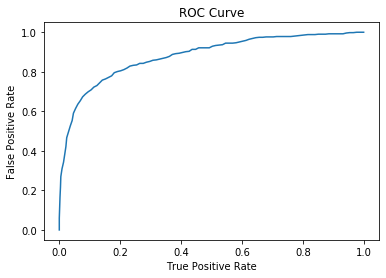

In [244]:
test_summary = lrModel.evaluate(test_data)

# Plotting the ROC curve, evaluating the performance of the model with TPR against FPR
import matplotlib.pyplot as plt
roc = test_summary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [245]:
# Printing the R squared values on the test data, showcasing the fit for logistic regression model. 
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="Attrition_Flag_index", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R Squared (R2) on test data = %g" % r2)

R Squared (R2) on test data = 0.213112


In [246]:
# showcasing the performance metrics, i.e., Overall Accuracy, Overall Error Rate, Sensitivity (Recall), Specificity. along with total count of predictions.
N = predictions.count()
true_positives = predictions.filter( col("prediction") == 1.0 ).filter( col("Attrition_Flag_index") == 1.0 ).count()
true_negatives = predictions.filter( col("prediction") == 0.0 ).filter( col("Attrition_Flag_index") == 0.0 ).count()
false_positives = predictions.filter( col("prediction") == 1.0 ).filter( col("Attrition_Flag_index") == 0.0 ).count()
false_negatives = predictions.filter( col("prediction") == 0.0 ).filter( col("Attrition_Flag_index") == 1.0 ).count()
print("N = %g" % N)
print("Overall Accuracy = %g" % ((true_negatives + true_positives)/N))
print("Overall Error Rate = %g" % ((false_negatives + false_positives)/N))
print("Sensitivity = %g" % (true_positives / (true_positives + false_negatives)))
print("Specificity = %g" % (true_negatives / (true_negatives + false_positives)))

N = 3089
Overall Accuracy = 0.891874
Overall Error Rate = 0.108126
Sensitivity = 0.523622
Specificity = 0.964355


In [247]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="Attrition_Flag_index", featuresCol="features", numTrees=10)
rfModel = rf.fit(train_data)
predictions = rfModel.transform(test_data)
predictions.select("prediction", "Attrition_Flag_index", "features").show(5)
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Attrition_Flag_index" , metricName="areaUnderROC")
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))
predictions.groupBy("Attrition_Flag_index", "prediction").count().show()

+----------+--------------------+--------------------+
|prediction|Attrition_Flag_index|            features|
+----------+--------------------+--------------------+
|       0.0|                 1.0|[7.08083283E8,58....|
|       0.0|                 1.0|[7.08084558E8,46....|
|       0.0|                 0.0|[7.08085458E8,34....|
|       0.0|                 0.0|[7.08100533E8,55....|
|       0.0|                 0.0|[7.08104658E8,46....|
+----------+--------------------+--------------------+
only showing top 5 rows

Test Area Under ROC: 0.9647011626452544
+--------------------+----------+-----+
|Attrition_Flag_index|prediction|count|
+--------------------+----------+-----+
|                 1.0|       1.0|  316|
|                 0.0|       1.0|   44|
|                 1.0|       0.0|  192|
|                 0.0|       0.0| 2537|
+--------------------+----------+-----+



- Training RAndon Forest Classifier and predicting binary outcomes, evaluating its performance, and analyzes the results. Training the model on train_data and making prediction on test_data.
- Also calculating, AUC(Area under ROC) using a Binary Classification Evaluator.
- Summarizing prediction with a partial confusion matrix for further analysis

In [248]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="Attrition_Flag_index", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R Squared (R2) on test data = %g" % r2)

R Squared (R2) on test data = 0.443996


In [249]:
# showcasing the performance metrics, i.e., Overall Accuracy, Overall Error Rate, Sensitivity (Recall), Specificity. along with total count of predictions.
N = predictions.count()
true_positives = predictions.filter( col("prediction") == 1.0 ).filter( col("Attrition_Flag_index") == 1.0 ).count()
true_negatives = predictions.filter( col("prediction") == 0.0 ).filter( col("Attrition_Flag_index") == 0.0 ).count()
false_positives = predictions.filter( col("prediction") == 1.0 ).filter( col("Attrition_Flag_index") == 0.0 ).count()
false_negatives = predictions.filter( col("prediction") == 0.0 ).filter( col("Attrition_Flag_index") == 1.0 ).count()
print("N = %g" % N)
print("Overall Accuracy = %g" % ((true_negatives + true_positives)/N))
print("Overall Error Rate = %g" % ((false_negatives + false_positives)/N))
print("Sensitivity = %g" % (true_positives / (true_positives + false_negatives)))
print("Specificity = %g" % (true_negatives / (true_negatives + false_positives)))

N = 3089
Overall Accuracy = 0.9236
Overall Error Rate = 0.0764001
Sensitivity = 0.622047
Specificity = 0.982952


In [250]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = ParamGridBuilder().addGrid(lr.regParam, [0.1, 0.01]).addGrid(lr.maxIter, [10, 400]).build()
crossval = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=2)
cvModel = crossval.fit(train_data)
predictions = cvModel.transform(test_data)
predictions.select("prediction", "Attrition_Flag_index", "features").show(5)

evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Attrition_Flag_index" , metricName="areaUnderROC")
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))
predictions.groupBy("Attrition_Flag_index", "prediction").count().show()

+----------+--------------------+--------------------+
|prediction|Attrition_Flag_index|            features|
+----------+--------------------+--------------------+
|       0.0|                 1.0|[7.08083283E8,58....|
|       1.0|                 1.0|[7.08084558E8,46....|
|       0.0|                 0.0|[7.08085458E8,34....|
|       0.0|                 0.0|[7.08100533E8,55....|
|       0.0|                 0.0|[7.08104658E8,46....|
+----------+--------------------+--------------------+
only showing top 5 rows

Test Area Under ROC: 0.9222925253289475
+--------------------+----------+-----+
|Attrition_Flag_index|prediction|count|
+--------------------+----------+-----+
|                 1.0|       1.0|  266|
|                 0.0|       1.0|   70|
|                 1.0|       0.0|  242|
|                 0.0|       0.0| 2511|
+--------------------+----------+-----+



- Performing Hyperparameter Tuning for a logistic regression model using a grid search and cross-validation.
- Training multiple models with different parameter combinations and it selects the best one based on the AUC curve.
- Evaluating the performance on test data, including a confusion matrix summary of predictions. 

In [251]:
paramGrid = ParamGridBuilder().addGrid(rf.numTrees, [10, 400]).build()
crossval = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=2)
cvModel = crossval.fit(train_data)
predictions = cvModel.transform(test_data)
predictions.select("prediction", "Attrition_Flag_index", "features").show(5)
 
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Attrition_Flag_index" , metricName="areaUnderROC")
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))
predictions.groupBy("Attrition_Flag_index", "prediction").count().show()

+----------+--------------------+--------------------+
|prediction|Attrition_Flag_index|            features|
+----------+--------------------+--------------------+
|       0.0|                 1.0|[7.08083283E8,58....|
|       0.0|                 1.0|[7.08084558E8,46....|
|       0.0|                 0.0|[7.08085458E8,34....|
|       0.0|                 0.0|[7.08100533E8,55....|
|       0.0|                 0.0|[7.08104658E8,46....|
+----------+--------------------+--------------------+
only showing top 5 rows

Test Area Under ROC: 0.9665377211420828
+--------------------+----------+-----+
|Attrition_Flag_index|prediction|count|
+--------------------+----------+-----+
|                 1.0|       1.0|  301|
|                 0.0|       1.0|   44|
|                 1.0|       0.0|  207|
|                 0.0|       0.0| 2537|
+--------------------+----------+-----+



- Performing the HyperParameter tuning for a Random Forest Classifier by testing different number of trees using cross-validation.
- Selcting the best model based on AUC curve.
- Evaluating the performance on test data, and providing a confusion matrix summary of predictions.  

In [252]:
# Implementing multiclass classification using the OvR strategy with logistic Regression as the base classifier. 
# Evaluating the performance using accuracy and classification error metrics.
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# instantiate the base classifier.
lr = LogisticRegression(maxIter=10, tol=1E-6, fitIntercept=True)
# instantiate the One Vs Rest Classifier.
ovr = OneVsRest(classifier=lr, labelCol="Attrition_Flag_index")
# train the multiclass model.
ovrModel = ovr.fit(train_data)
# score the model on test data.
predictions = ovrModel.transform(test_data)
# obtain evaluator. 
evaluator = MulticlassClassificationEvaluator(metricName="accuracy", labelCol="Attrition_Flag_index")
# compute the classification error on test data.
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Test Accuracy = %g " % accuracy)

Test Error = 0.108126 
Test Accuracy = 0.891874 


In [253]:
N = predictions.count()
true_positives = predictions.filter( col("prediction") == 1.0 ).filter( col("Attrition_Flag_index") == 1.0 ).count()
true_negatives = predictions.filter( col("prediction") == 0.0 ).filter( col("Attrition_Flag_index") == 0.0 ).count()
false_positives = predictions.filter( col("prediction") == 1.0 ).filter( col("Attrition_Flag_index") == 0.0 ).count()
false_negatives = predictions.filter( col("prediction") == 0.0 ).filter( col("Attrition_Flag_index") == 1.0 ).count()
print("N = %g" % N)
print("Overall Accuracy = %g" % ((true_negatives + true_positives)/N))
print("Overall Error Rate = %g" % ((false_negatives + false_positives)/N))
print("Sensitivity = %g" % (true_positives / (true_positives + false_negatives)))
print("Specificity = %g" % (true_negatives / (true_negatives + false_positives)))

N = 3089
Overall Accuracy = 0.891874
Overall Error Rate = 0.108126
Sensitivity = 0.523622
Specificity = 0.964355
